In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aug = pd.read_csv('311_8-01_to_8-31function.csv')

In [3]:
aug['created_date'] = pd.to_datetime(aug['created_date'])
aug["day_of_week"] = aug['created_date'].dt.day_name()
aug['closed_date'] = pd.to_datetime(aug['closed_date'])
aug['days_elapsed'] = (aug['closed_date'] - aug['created_date']).dt.days

In [4]:
aug.tail()

,address_type,agency,agency_name,bbl,borough,city,closed_date,community_board,complaint_type,created_date,...,park_facility_name,resolution_action_updated_date,resolution_description,status,street_name,unique_key,x_coordinate_state_plane,y_coordinate_state_plane,day_of_week,days_elapsed
176010,NaN,NYPD,New York City Police Department,2.028771e+09,BRONX,BRONX,2019-08-31 07:23:09,05 BRONX,Noise - Street/Sidewalk,2019-08-30 23:59:24,...,Unspecified,2019-08-31T11:23:14.000,The Police Department responded to the complai...,Closed,WEST TREMONT AVENUE,43678664,1007162.0,249724.0,Friday,0.0
176011,NaN,NYPD,New York City Police Department,4.088410e+09,QUEENS,WOODHAVEN,2019-08-31 02:55:47,09 QUEENS,Noise - Residential,2019-08-30 23:59:29,...,Unspecified,2019-08-31T06:55:56.000,The Police Department responded to the complai...,Closed,86 AVENUE,43678521,1021651.0,191874.0,Friday,0.0
176012,NaN,NYPD,New York City Police Department,NaN,BROOKLYN,BROOKLYN,2019-08-31 04:51:15,14 BROOKLYN,Noise - Residential,2019-08-30 23:59:35,...,Unspecified,2019-08-31T08:51:34.000,The Police Department responded to the complai...,Closed,AVENUE D,43685124,996710.0,172642.0,Friday,0.0
176013,NaN,NYPD,New York City Police Department,3.044530e+09,BROOKLYN,BROOKLYN,2019-08-31 02:47:46,05 BROOKLYN,Noise - Residential,2019-08-30 23:59:38,...,Unspecified,2019-08-31T06:47:59.000,The Police Department responded to the complai...,Closed,SHEPHERD AVENUE,43682601,1018082.0,182051.0,Friday,0.0
176014,INTERSECTION,DOT,Department of Transportation,NaN,MANHATTAN,NaN,2019-08-31 00:25:00,Unspecified MANHATTAN,Traffic Signal Condition,2019-08-31 00:00:00,...,Unspecified,2019-08-31T00:25:00.000,Service Request status for this request is ava...,Closed,NaN,43678985,NaN,NaN,Saturday,0.0


In [44]:
one_day = aug['complaint_type'][aug['days_elapsed']<=1].value_counts()
one_day = one_day[:5,]

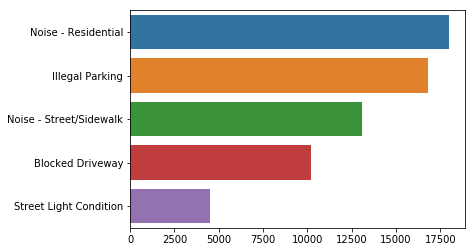

In [45]:
sns.barplot(one_day.values, one_day.index)

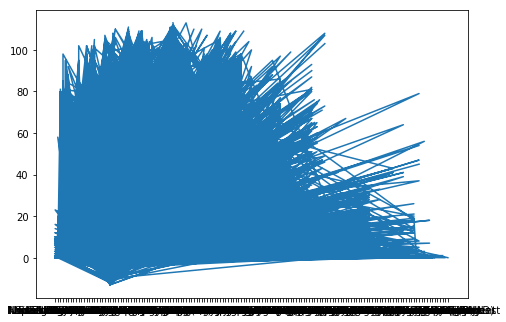

In [63]:
x = aug.complaint_type
y = aug.days_elapsed

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)
plt.show()

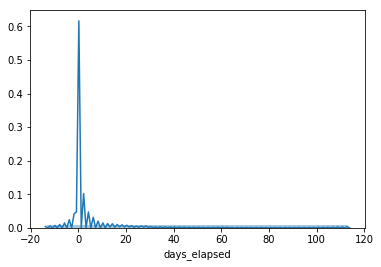

In [68]:
sns.distplot(aug.days_elapsed, bins = 1)

Text(0.5, 1.0, 'Complaint Type vs Days Elapsed')

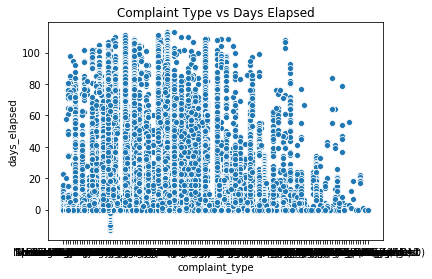

In [72]:
sns.scatterplot(x=aug['complaint_type'], y=aug['days_elapsed']).set_title('Complaint Type vs Days Elapsed')

Text(0.5, 1.0, 'Days Elapsed vs Complaint Type')

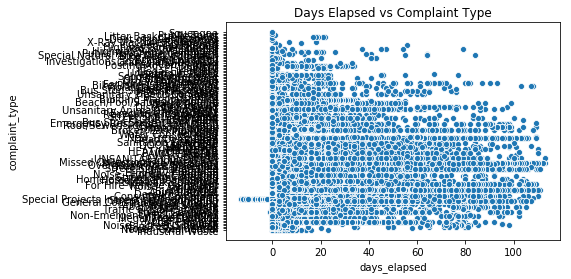

In [73]:
sns.scatterplot(y=aug['complaint_type'], x=aug['days_elapsed']).set_title('Days Elapsed vs Complaint Type')

Text(0.5, 1.0, 'Days Elapsed vs Complaint Type')

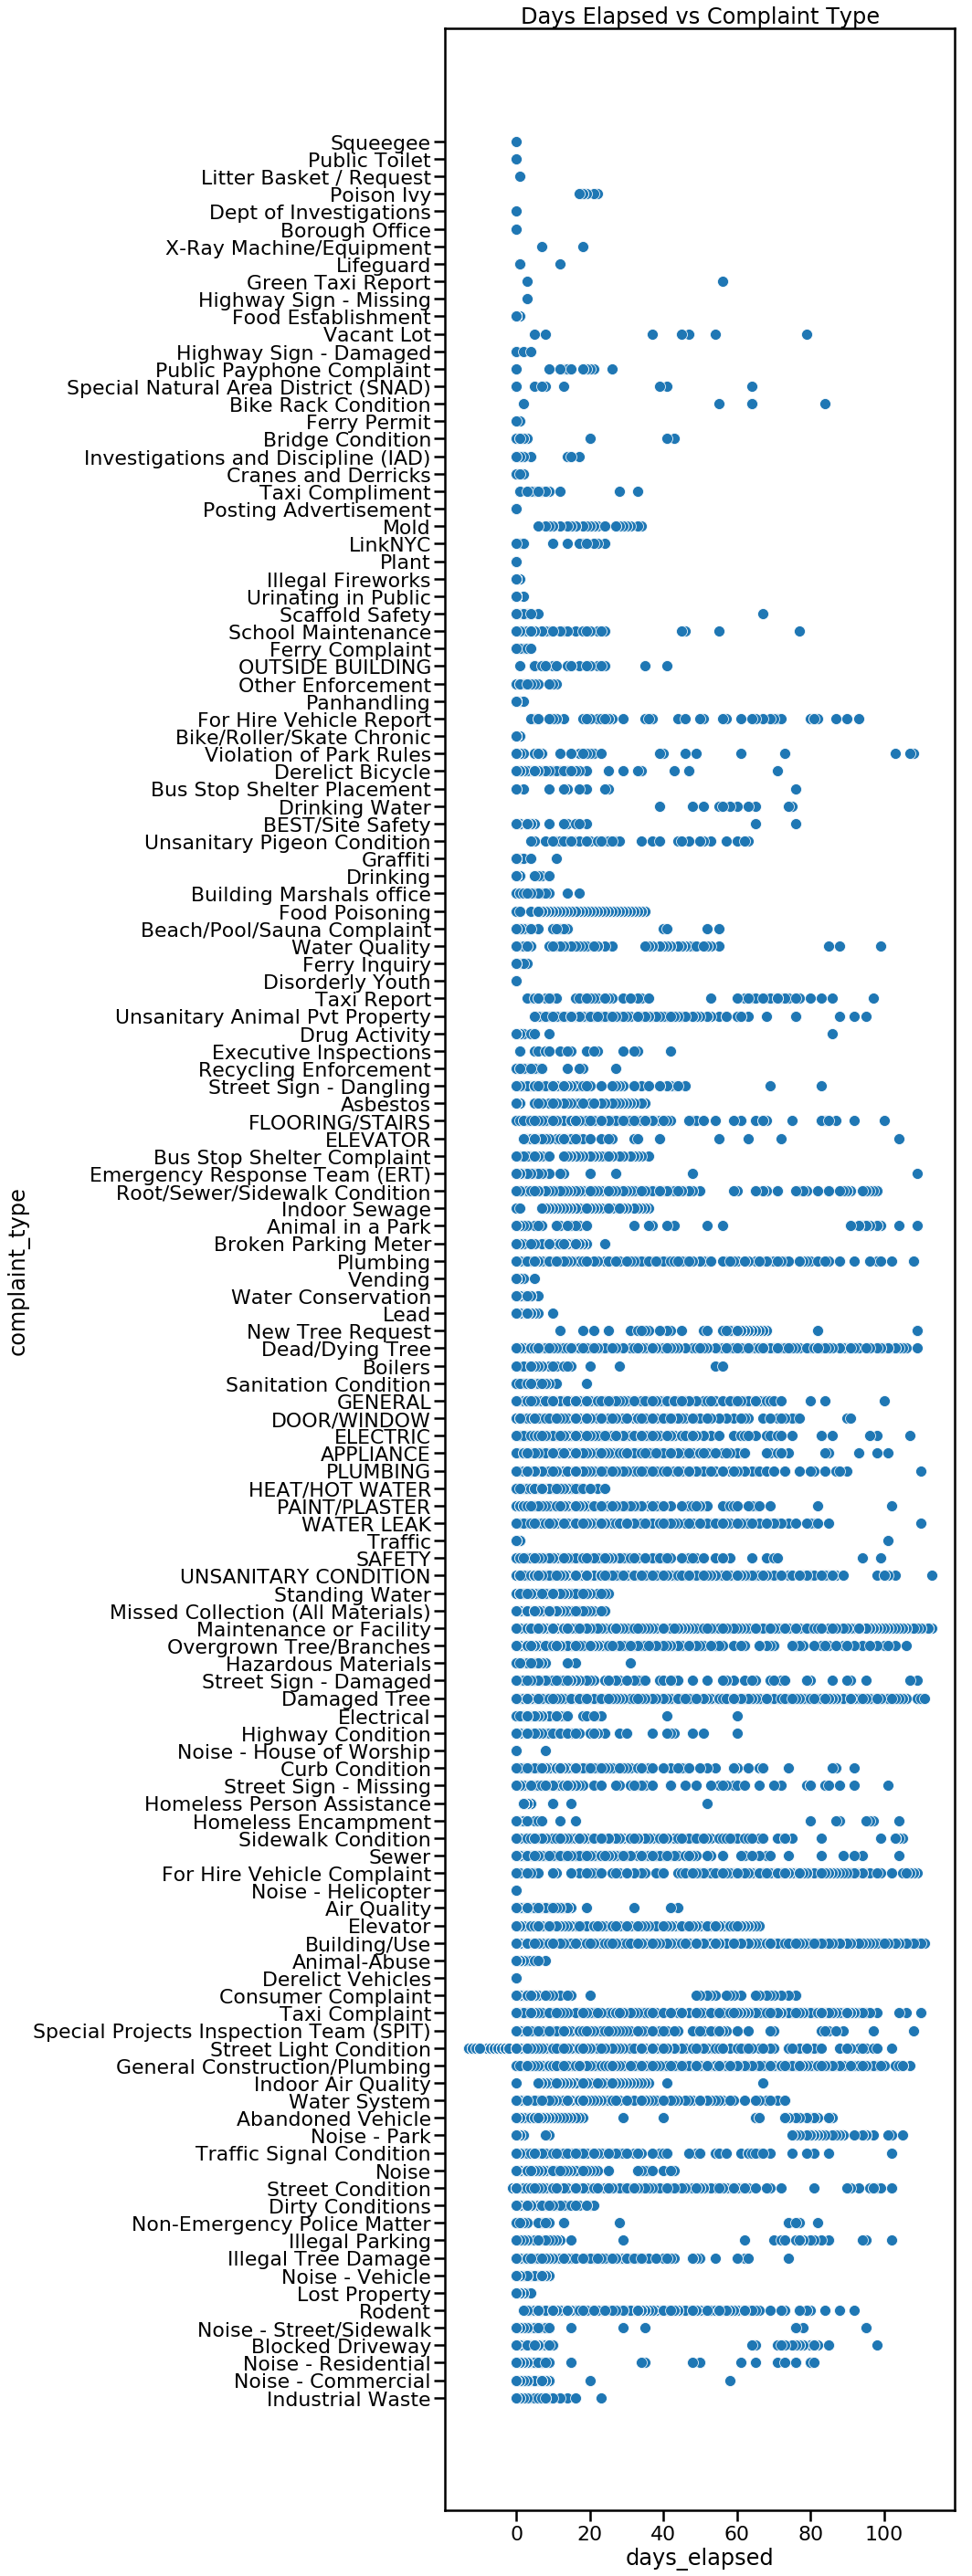

In [46]:
plt.figure(figsize= (10,50))
sns.scatterplot(y=aug['complaint_type'], x=aug['days_elapsed']).set_title('Days Elapsed vs Complaint Type')

<function seaborn.utils.load_dataset(name, cache=True, data_home=None, **kws)>

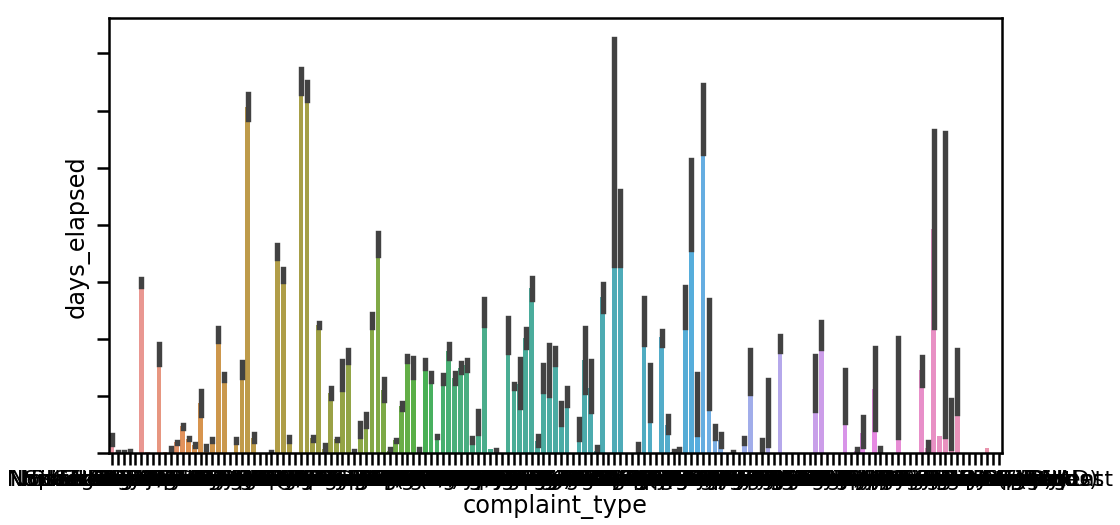

In [85]:
plt.figure(figsize= (16,8))
sns.set_context('poster')
ax = sns.barplot(y="days_elapsed", x="complaint_type", data=aug)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha="right")
sns.load_dataset

Text(0.5, 1.0, 'Agency vs Days Elapsed')

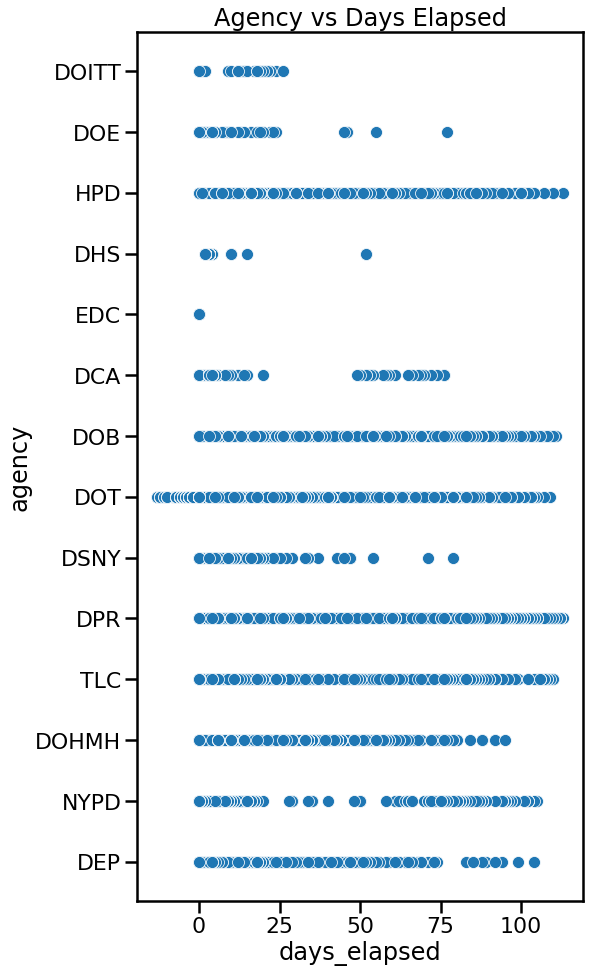

In [49]:
plt.figure(figsize= (8,16))
sns.scatterplot(y=aug['agency'], x=aug['days_elapsed']).set_title('Agency vs Days Elapsed')

In [8]:
aug.days_elapsed.value_counts()

 0.0      98698
 1.0       9212
 2.0       6954
 3.0       4967
 4.0       3081
 5.0       2713
 6.0       2442
 7.0       1989
 8.0       1521
 14.0      1297
 9.0       1261
 13.0      1259
 10.0      1128
 12.0      1096
 15.0      1078
 17.0      1066
 18.0       998
 11.0       997
 16.0       987
 19.0       934
 20.0       897
 21.0       805
 22.0       793
 26.0       697
 28.0       668
 23.0       655
 27.0       620
-3.0        605
 24.0       590
 25.0       550
          ...  
 88.0        44
 96.0        43
 100.0       42
 109.0       41
 101.0       40
 94.0        39
 97.0        38
 92.0        37
 103.0       34
 89.0        33
 105.0       31
 102.0       29
 104.0       28
 107.0       26
 99.0        26
 108.0       23
 106.0       20
-10.0        16
-5.0         15
-6.0         14
-11.0        14
-7.0         13
 110.0       12
-1.0          9
-12.0         9
-13.0         8
 112.0        5
 111.0        4
 113.0        2
-8.0          1
Name: days_elapsed, Leng

In [9]:
aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176015 entries, 0 to 176014
Data columns (total 39 columns):
address_type                      66346 non-null object
agency                            176015 non-null object
agency_name                       176015 non-null object
bbl                               144019 non-null float64
borough                           176015 non-null object
city                              158644 non-null object
closed_date                       162242 non-null datetime64[ns]
community_board                   176015 non-null object
complaint_type                    176015 non-null object
created_date                      176015 non-null datetime64[ns]
cross_street_1                    141332 non-null object
cross_street_2                    141273 non-null object
descriptor                        172431 non-null object
facility_type                     5835 non-null object
incident_address                  164091 non-null object
incident_zip        

In [27]:
aug.days_elapsed.describe()

count    162242.000000
mean          6.254965
std          14.981914
min         -13.000000
25%           0.000000
50%           0.000000
75%           4.000000
max         113.000000
Name: days_elapsed, dtype: float64

### Complaint Mean

In [47]:
complaint_mean = aug.groupby(['complaint_type']).days_elapsed.mean().sort_values(ascending=False)
complaint_mean

complaint_type
For Hire Vehicle Complaint        65.029354
New Tree Request                  63.338870
Taxi Complaint                    60.612782
Drinking Water                    58.545455
Bike Rack Condition               55.500000
For Hire Vehicle Report           43.595745
Taxi Report                       39.550000
Vacant Lot                        39.285714
Maintenance or Facility           36.655172
Building/Use                      35.294174
Elevator                          31.169868
Rodent                            29.909582
Green Taxi Report                 29.500000
Root/Sewer/Sidewalk Condition     28.875421
Unsanitary Animal Pvt Property    27.430052
Unsanitary Pigeon Condition       25.467742
Dead/Dying Tree                   24.709630
Damaged Tree                      23.178664
Water Quality                     23.176471
Sidewalk Condition                22.411348
Indoor Air Quality                20.817308
Plumbing                          20.706250
Mold             

In [45]:
complaint_mean.sort_values(ascending=False)

complaint_type
For Hire Vehicle Complaint        65.029354
New Tree Request                  63.338870
Taxi Complaint                    60.612782
Drinking Water                    58.545455
Bike Rack Condition               55.500000
For Hire Vehicle Report           43.595745
Taxi Report                       39.550000
Vacant Lot                        39.285714
Maintenance or Facility           36.655172
Building/Use                      35.294174
Elevator                          31.169868
Rodent                            29.909582
Green Taxi Report                 29.500000
Root/Sewer/Sidewalk Condition     28.875421
Unsanitary Animal Pvt Property    27.430052
Unsanitary Pigeon Condition       25.467742
Dead/Dying Tree                   24.709630
Damaged Tree                      23.178664
Water Quality                     23.176471
Sidewalk Condition                22.411348
Indoor Air Quality                20.817308
Plumbing                          20.706250
Mold             

In [48]:
complaint_mean.index

Index(['For Hire Vehicle Complaint', 'New Tree Request', 'Taxi Complaint',
       'Drinking Water', 'Bike Rack Condition', 'For Hire Vehicle Report',
       'Taxi Report', 'Vacant Lot', 'Maintenance or Facility', 'Building/Use',
       ...
       'Municipal Parking Facility', 'Pet Shop', 'Safety',
       'Single Occupancy Bathroom', 'Smoking', 'Tattooing', 'Unleashed Dog',
       'Unsanitary Animal Facility', 'Unsanitary Condition', 'Window Guard'],
      dtype='object', name='complaint_type', length=151)

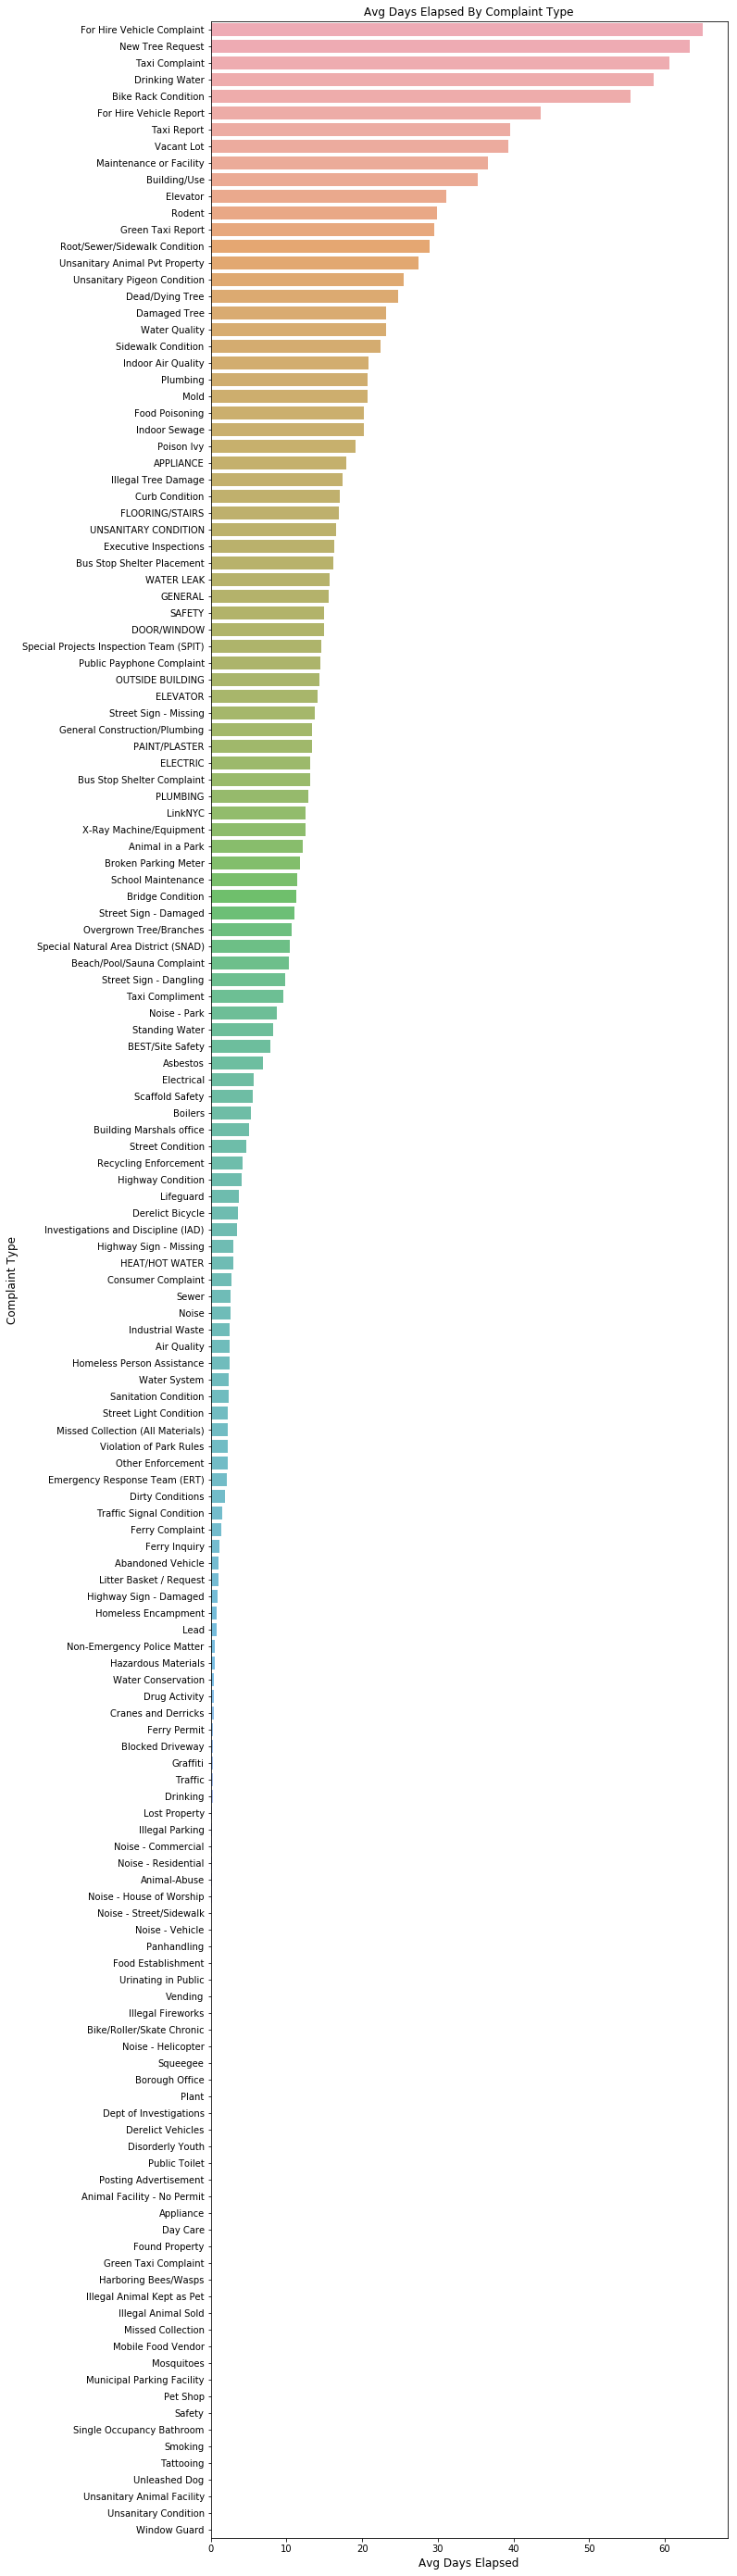

In [52]:
plt.figure(figsize=(10,50))
sns.barplot(complaint_mean.values, complaint_mean.index, alpha=0.8)
plt.title('Avg Days Elapsed By Complaint Type')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Avg Days Elapsed', fontsize=12)
plt.show()

In [54]:
asc_complaint_mean = aug.groupby(['complaint_type']).days_elapsed.mean().sort_values(ascending=True)
asc_complaint_mean

complaint_type
Posting Advertisement           0.000000
Public Toilet                   0.000000
Disorderly Youth                0.000000
Derelict Vehicles               0.000000
Dept of Investigations          0.000000
Plant                           0.000000
Borough Office                  0.000000
Squeegee                        0.000000
Noise - Helicopter              0.000000
Bike/Roller/Skate Chronic       0.019802
Illegal Fireworks               0.020000
Vending                         0.021997
Urinating in Public             0.028986
Food Establishment              0.032258
Panhandling                     0.067797
Noise - Vehicle                 0.071244
Noise - Street/Sidewalk         0.095697
Noise - House of Worship        0.109589
Animal-Abuse                    0.123288
Noise - Residential             0.137485
Noise - Commercial              0.162556
Illegal Parking                 0.197517
Lost Property                   0.208854
Drinking                        0.225225
T

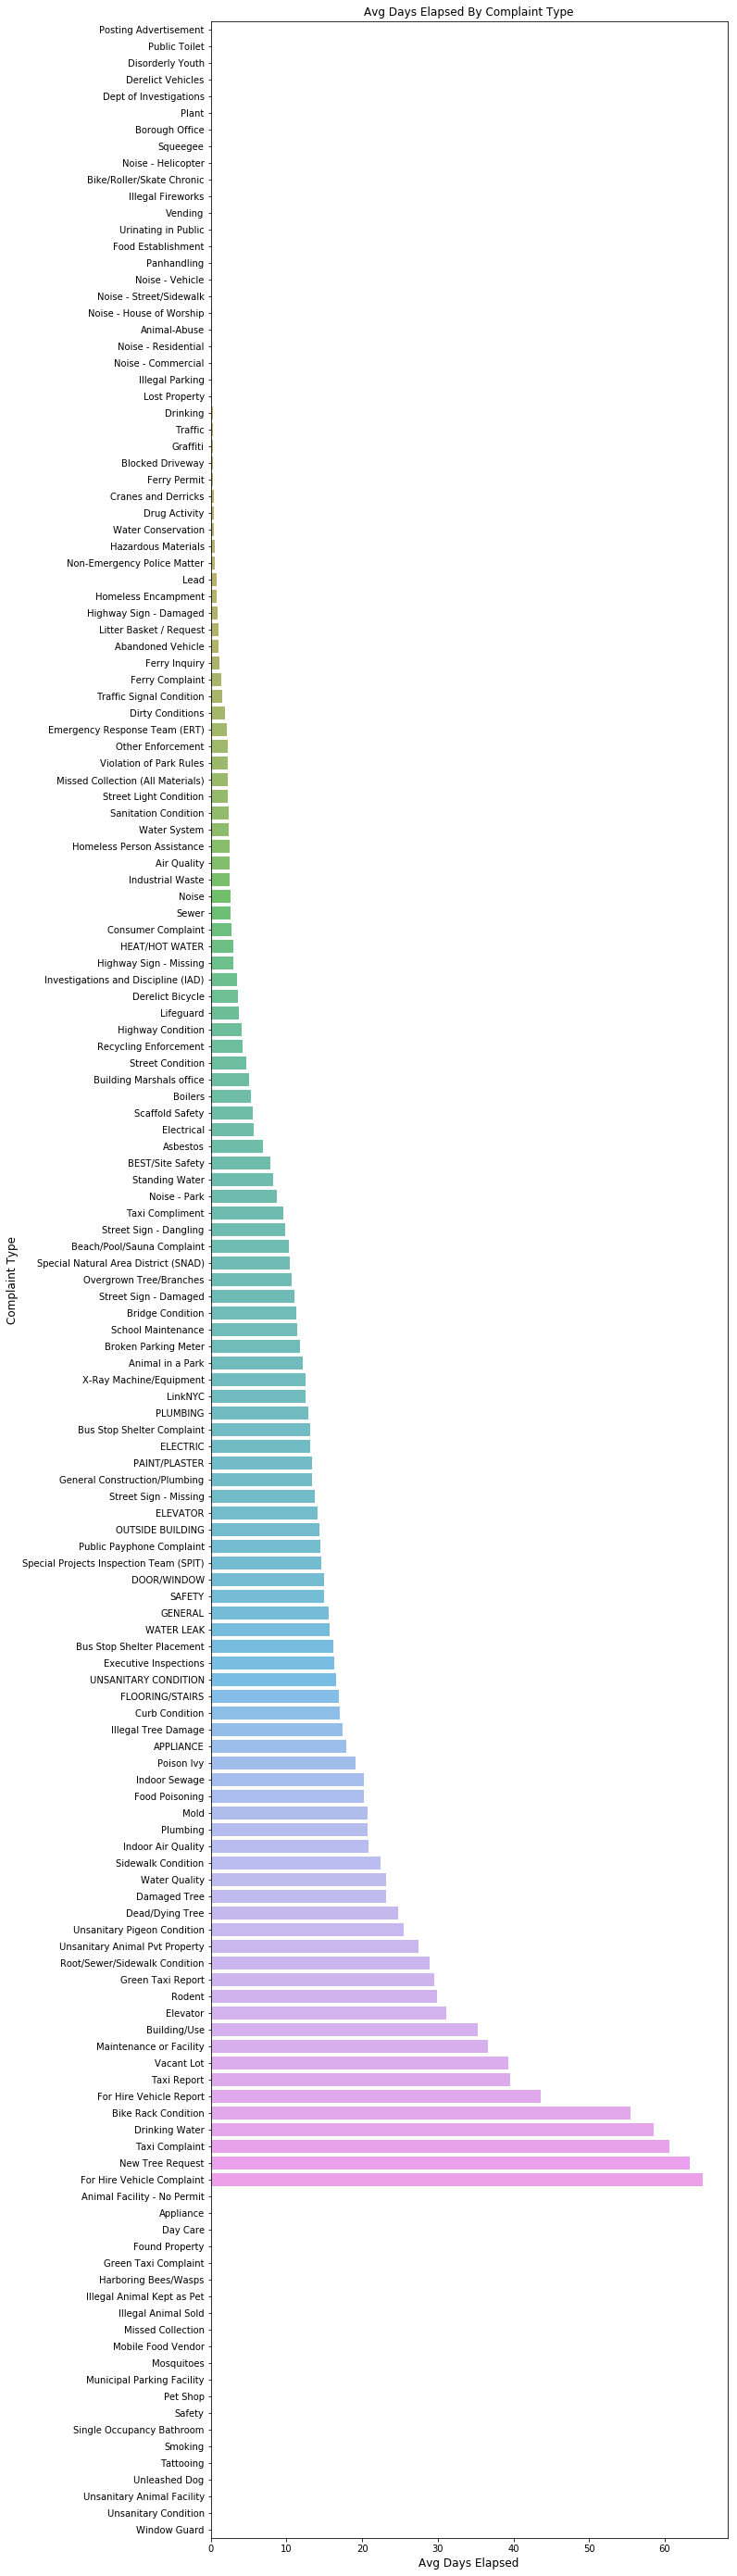

In [53]:
plt.figure(figsize=(10,50))
sns.barplot(asc_complaint_mean.values, asc_complaint_mean.index, alpha=0.8)
plt.title('Avg Days Elapsed By Complaint Type')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Avg Days Elapsed', fontsize=12)
plt.show()

In [24]:
aug.head()

,address_type,agency,agency_name,bbl,borough,city,closed_date,community_board,complaint_type,created_date,...,park_facility_name,resolution_action_updated_date,resolution_description,status,street_name,unique_key,x_coordinate_state_plane,y_coordinate_state_plane,day_of_week,days_elapsed
0,ADDRESS,DEP,Department of Environmental Protection,5.047110e+09,STATEN ISLAND,STATEN ISLAND,2019-08-01 00:00:00,03 STATEN ISLAND,Industrial Waste,2019-08-01 00:00:00,...,Unspecified,2019-08-01T00:00:00.000,The Department of Environmental Protection inv...,Closed,CHESTERTON AVENUE,43445244,948706.0,142824.0,Thursday,0.0
1,NaN,NYPD,New York City Police Department,4.102530e+09,QUEENS,JAMAICA,2019-08-01 01:03:52,12 QUEENS,Noise - Commercial,2019-08-01 00:00:56,...,Unspecified,2019-08-01T05:03:57.000,The Police Department responded to the complai...,Closed,MERRICK BOULEVARD,43431340,1043447.0,193733.0,Thursday,0.0
2,NaN,NYPD,New York City Police Department,1.016330e+09,MANHATTAN,NEW YORK,2019-08-01 00:57:35,11 MANHATTAN,Noise - Residential,2019-08-01 00:01:12,...,Unspecified,2019-08-01T04:57:38.000,The Police Department responded to the complai...,Closed,EAST 105 STREET,43432351,999202.0,227558.0,Thursday,0.0
3,NaN,NYPD,New York City Police Department,3.018040e+09,BROOKLYN,BROOKLYN,2019-08-01 01:19:31,03 BROOKLYN,Noise - Residential,2019-08-01 00:01:29,...,Unspecified,2019-08-01T05:19:33.000,The Police Department responded to the complai...,Closed,LEXINGTON AVENUE,43433332,999152.0,190013.0,Thursday,0.0
4,NaN,NYPD,New York City Police Department,4.098950e+09,QUEENS,JAMAICA,2019-08-01 02:13:40,12 QUEENS,Blocked Driveway,2019-08-01 00:01:36,...,Unspecified,2019-08-01T06:13:48.000,The Police Department responded to the complai...,Closed,179 PLACE,43429747,1044719.0,197721.0,Thursday,0.0


## Complaint Type

In [14]:
r_noise = aug.loc[aug.complaint_type=='Noise - Residential']

In [16]:
r_noise.days_elapsed.describe()

count    18162.000000
mean         0.137485
std          2.457431
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         81.000000
Name: days_elapsed, dtype: float64

In [19]:
aug.loc[aug.complaint_type=='Noise - Residential'].days_elapsed.describe()

count    18162.000000
mean         0.137485
std          2.457431
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         81.000000
Name: days_elapsed, dtype: float64

<function seaborn.utils.load_dataset(name, cache=True, data_home=None, **kws)>

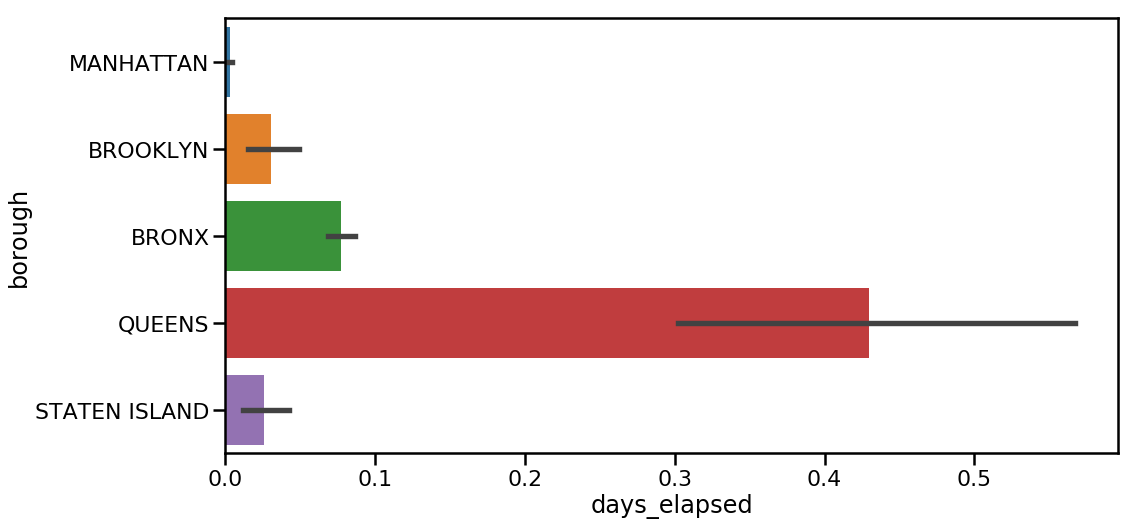

In [35]:
plt.figure(figsize= (16,8))
sns.set_context('poster')
ax = sns.barplot(x="days_elapsed", y="borough", data=r_noise)
ax.set_title
# ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha="right")
sns.load_dataset

In [21]:
rodent = aug.loc[aug.complaint_type=='Rodent']

In [22]:
rodent.days_elapsed.describe()

count    3329.000000
mean       29.909582
std        16.583992
min         2.000000
25%        16.000000
50%        25.000000
75%        44.000000
max        92.000000
Name: days_elapsed, dtype: float64

<function seaborn.utils.load_dataset(name, cache=True, data_home=None, **kws)>

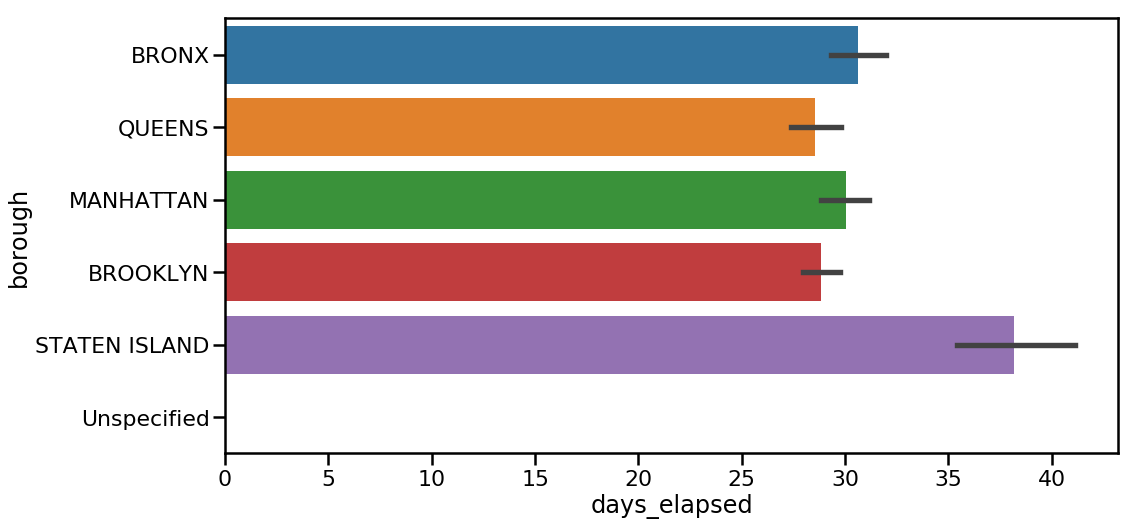

In [42]:
plt.figure(figsize= (16,8))
sns.set_context('poster')
ax = sns.barplot(x="days_elapsed", y="borough", data=rodent)
# ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha="right")
sns.load_dataset

In [23]:
aug.complaint_type.value_counts()

Noise - Residential                  18218
Illegal Parking                      17095
Noise - Street/Sidewalk              13198
Blocked Driveway                     10438
Sidewalk Condition                    7833
Street Condition                      7072
Street Light Condition                5688
Water System                          5620
General Construction/Plumbing         4384
Abandoned Vehicle                     4105
UNSANITARY CONDITION                  3889
Noise - Vehicle                       3878
Noise                                 3686
Missed Collection (All Materials)     3403
Rodent                                3336
Damaged Tree                          3328
Derelict Vehicles                     3192
Traffic Signal Condition              3075
Sewer                                 2969
Dirty Conditions                      2908
Noise - Commercial                    2473
Homeless Person Assistance            2313
Overgrown Tree/Branches               2095
Building/Us

In [9]:
print(aug.groupby(['borough', 'complaint_type']).borough.count().unstack())

complaint_type  APPLIANCE  Abandoned Vehicle  Air Quality  \
borough                                                     
BRONX               219.0              537.0         67.0   
BROOKLYN            217.0             1015.0        235.0   
MANHATTAN           141.0               89.0        224.0   
QUEENS               63.0             2100.0        122.0   
STATEN ISLAND        13.0              364.0         28.0   
Unspecified           NaN                NaN          NaN   

complaint_type  Animal Facility - No Permit  Animal in a Park  Animal-Abuse  \
borough                                                                       
BRONX                                   1.0              15.0         121.0   
BROOKLYN                                1.0              64.0         175.0   
MANHATTAN                               1.0              55.0         123.0   
QUEENS                                  5.0              38.0         132.0   
STATEN ISLAND                        

In [10]:
test = aug.groupby(['borough', 'complaint_type']).borough.count().unstack()

In [11]:
test.head()

complaint_type,APPLIANCE,Abandoned Vehicle,Air Quality,Animal Facility - No Permit,Animal in a Park,Animal-Abuse,Appliance,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,...,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,WATER LEAK,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
borough,,,,,,,,,,,,,,,,,,,,,
BRONX,219.0,537.0,67.0,1.0,15.0,121.0,NaN,28.0,NaN,2.0,...,6.0,2.0,36.0,82.0,451.0,103.0,13.0,1440.0,NaN,NaN
BROOKLYN,217.0,1015.0,235.0,1.0,64.0,175.0,NaN,34.0,9.0,9.0,...,13.0,4.0,108.0,97.0,486.0,103.0,30.0,1447.0,NaN,2.0
MANHATTAN,141.0,89.0,224.0,1.0,55.0,123.0,NaN,52.0,14.0,6.0,...,29.0,NaN,378.0,143.0,325.0,57.0,22.0,1124.0,1.0,1.0
QUEENS,63.0,2100.0,122.0,5.0,38.0,132.0,1.0,30.0,12.0,13.0,...,17.0,2.0,59.0,82.0,144.0,111.0,29.0,1268.0,NaN,NaN
STATEN ISLAND,13.0,364.0,28.0,NaN,20.0,34.0,NaN,5.0,NaN,6.0,...,4.0,NaN,10.0,13.0,30.0,29.0,8.0,334.0,NaN,NaN


In [15]:
test.fillna(0, inplace=True)

In [16]:
test

complaint_type,APPLIANCE,Abandoned Vehicle,Air Quality,Animal Facility - No Permit,Animal in a Park,Animal-Abuse,Appliance,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,...,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,WATER LEAK,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
borough,,,,,,,,,,,,,,,,,,,,,
BRONX,219.0,537.0,67.0,1.0,15.0,121.0,0.0,28.0,0.0,2.0,...,6.0,2.0,36.0,82.0,451.0,103.0,13.0,1440.0,0.0,0.0
BROOKLYN,217.0,1015.0,235.0,1.0,64.0,175.0,0.0,34.0,9.0,9.0,...,13.0,4.0,108.0,97.0,486.0,103.0,30.0,1447.0,0.0,2.0
MANHATTAN,141.0,89.0,224.0,1.0,55.0,123.0,0.0,52.0,14.0,6.0,...,29.0,0.0,378.0,143.0,325.0,57.0,22.0,1124.0,1.0,1.0
QUEENS,63.0,2100.0,122.0,5.0,38.0,132.0,1.0,30.0,12.0,13.0,...,17.0,2.0,59.0,82.0,144.0,111.0,29.0,1268.0,0.0,0.0
STATEN ISLAND,13.0,364.0,28.0,0.0,20.0,34.0,0.0,5.0,0.0,6.0,...,4.0,0.0,10.0,13.0,30.0,29.0,8.0,334.0,0.0,0.0
Unspecified,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,7.0,0.0,0.0


In [19]:
bronx = aug.loc[aug.borough=='BRONX']

In [20]:
bronx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 6 to 176010
Data columns (total 38 columns):
address_type                      12367 non-null object
agency                            29958 non-null object
agency_name                       29958 non-null object
bbl                               25027 non-null float64
borough                           29958 non-null object
city                              27246 non-null object
closed_date                       28629 non-null object
community_board                   29958 non-null object
complaint_type                    29958 non-null object
created_date                      29958 non-null datetime64[ns]
cross_street_1                    22376 non-null object
cross_street_2                    22407 non-null object
descriptor                        29723 non-null object
facility_type                     534 non-null object
incident_address                  27959 non-null object
incident_zip                      28895 non

In [22]:
bronx.set_index('created_date', inplace=True)

In [27]:
bronx.head()

,address_type,agency,agency_name,bbl,borough,city,closed_date,community_board,complaint_type,cross_street_1,...,park_borough,park_facility_name,resolution_action_updated_date,resolution_description,status,street_name,unique_key,x_coordinate_state_plane,y_coordinate_state_plane,day_of_week
created_date,,,,,,,,,,,,,,,,,,,,,
2019-08-01 00:01:43,ADDRESS,DOHMH,Department of Health and Mental Hygiene,2.029330e+09,BRONX,BRONX,2019-10-03T16:19:24.000,03 BRONX,Rodent,BEND,...,BRONX,Unspecified,2019-08-01T00:02:29.000,NaN,Closed,EAST 169 STREET,43431063,1011619.0,242198.0,Thursday
2019-08-01 00:03:10,NaN,NYPD,New York City Police Department,NaN,BRONX,NaN,2019-08-01T01:20:27.000,06 BRONX,Noise - Residential,FAIRMONT PLACE,...,BRONX,Unspecified,2019-08-01T05:20:29.000,The Police Department responded to the complai...,Closed,FAIRMONT PLACE,43430393,1014675.0,246495.0,Thursday
2019-08-01 00:03:14,NaN,DPR,Department of Parks and Recreation,2.043240e+09,BRONX,BRONX,2019-08-15T18:00:39.000,11 BRONX,Illegal Tree Damage,LYDIG AVENUE,...,BRONX,Unspecified,2019-08-15T22:00:42.000,The Department of Parks and Recreation visited...,Closed,MULINER AVENUE,43431649,1022437.0,250879.0,Thursday
2019-08-01 00:09:29,NaN,NYPD,New York City Police Department,2.042370e+09,BRONX,BRONX,2019-08-01T03:42:46.000,10 BRONX,Illegal Parking,ARNOW PLACE,...,BRONX,Unspecified,2019-08-01T07:42:50.000,The Police Department responded and upon arriv...,Closed,SCHUYLER PLACE,43434440,1031601.0,249223.0,Thursday
2019-08-01 00:09:51,NaN,NYPD,New York City Police Department,2.028460e+09,BRONX,BRONX,2019-08-01T23:08:13.000,04 BRONX,Noise - Vehicle,EAST 172 STREET,...,BRONX,Unspecified,2019-08-02T03:08:16.000,The Police Department responded and upon arriv...,Closed,TOWNSEND AVENUE,43429769,1007972.0,246572.0,Thursday


In [26]:
temp_bidaily= bronx.resample('12H').asfreq()
temp_bidaily.head()

ValueError: cannot reindex from a duplicate axis